In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_train = np.arange(1, 100)
y_train = np.log(x_train)

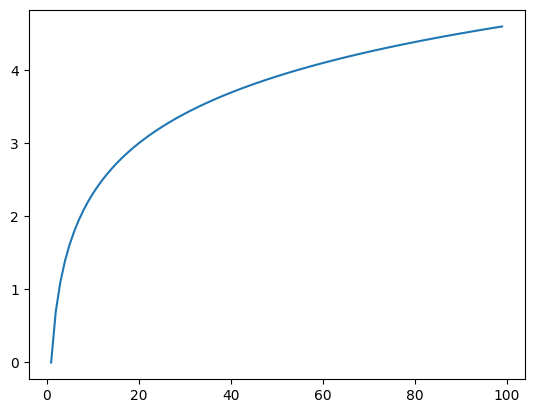

In [3]:
plt.plot(x_train, y_train)

In [4]:
def feature_engineering(x, degree):
    df = pd.DataFrame(x_train, columns = ['x'])
    for i in range(2 , degree+1):
        feature_name = "*".join("x" for j in range(0,i))
        df[feature_name] = df[['x','*'.join('x' for j in range(0,i-1))]].prod(axis = 1)
        x = df.to_numpy()
    return x

In [5]:
def intialising_para(x):
    m, n = x.shape
    w = np.zeros(n)
    b = 0
    return w, b

In [6]:
def normal_ele(x):
    meu = np.mean(x, axis = 0)
    max = np.max(x, axis = 0)
    min = np.min(x, axis = 0)

    return meu, max, min

In [7]:
def normalisation(x, meu, max, min):
    n_x = (x - meu)/(max - min)
    return n_x

In [8]:
def cost(x, w, b, y):
    m, n = x.shape
    y_hat = np.dot(x, w) + b
    j = np.sum(np.square(y_hat - y))
    j /= (2 * m)
    return j

In [9]:
def derivatives(x, w, b, y):
    m, n = x.shape
    y_hat = np.dot(x, w) + b
    err = y_hat - y
    dj_dw = np.dot(x.T, err) / m
    dj_db = np.sum(err) / m
    return dj_dw, dj_db

In [10]:
def update_para(x, w, b, y, alpha):
    dj_dw , dj_db = derivatives(x, w, b, y)
    w = w -  alpha*dj_dw
    b = b - alpha*dj_db
    return w, b

In [11]:
num_iters = 10000
alpha = 0.1
degree = 4
poly_x_train = feature_engineering(x_train, degree)
w, b = intialising_para(poly_x_train)
meu, max, min = normal_ele(poly_x_train)
# print(meu , max, min)
n_poly_x_train = normalisation(poly_x_train, meu, max, min)
j_his = []
for i in range(1000):
    w, b = update_para(n_poly_x_train, w, b, y_train, alpha)
    j = cost(n_poly_x_train, w, b, y_train)
    j_his.append(j)
    if (i % 100 == 0):
        print(f"iteration: {i} : cost {j}")

iteration: 0 : cost 5.739364234791174
iteration: 100 : cost 0.147689290578392
iteration: 200 : cost 0.126240252919677
iteration: 300 : cost 0.10965686999582476
iteration: 400 : cost 0.09661403770963672
iteration: 500 : cost 0.08634638641016054
iteration: 600 : cost 0.0782543736105608
iteration: 700 : cost 0.07186803663737794
iteration: 800 : cost 0.06681898558022104
iteration: 900 : cost 0.06281845009000275


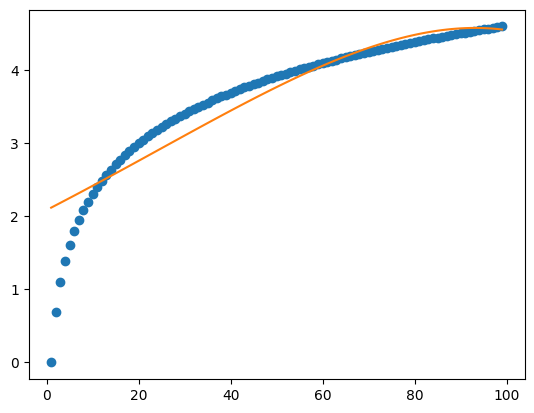

In [12]:
plt.plot(x_train, y_train, "o")
plt.plot(x_train, np.dot(n_poly_x_train, w) + b)